In [29]:
from __future__ import division
from pyoperators import pcg
from pysimulators import profile

# QUBIC packages
import qubic
from qubicpack.utilities import Qubic_DataDir
from qubic.data import PATH
from qubic.io import read_map
from qubic import QubicSkySim as qss
import Acquisition as Acq

# Display packages
import healpy as hp
import matplotlib.pyplot as plt

# FG-Buster packages
import component_model as c
import mixing_matrix as mm

# General packages
import numpy as np
import pysm3
import warnings
from qubic import QubicSkySim as qss
import pysm3.units as u
from importlib import reload
from pysm3 import utils

from qubic import SpectroImLib as sp
from importlib import reload
import gc
import copy


# PyOperators packages
from pyoperators import (
    BlockColumnOperator, BlockDiagonalOperator, BlockRowOperator,
    CompositionOperator, DiagonalOperator, I, IdentityOperator,
    MPIDistributionIdentityOperator, MPI, proxy_group, ReshapeOperator,
    rule_manager, pcg, Operator)

from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator
warnings.filterwarnings("ignore")
%matplotlib inline

# %config InlineBackend.figure_format='retina'
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))



In [31]:
nside = 256
relative_bandwidth = 0.25
band = 220.
seed = 42
noiseless = True

npointings = 1200
Nf_TOD = 20

In [32]:
reload(Acq)

# Repository for dictionary
global_dir = Qubic_DataDir()
print(global_dir)
dictfilename = global_dir + 'dicts/pipeline_demo.dict'

# Read dictionary chosen
d_TOD = qubic.qubicdict.qubicDict()
d_TOD.read_from_file(dictfilename)

d_TOD['nf_recon'] = Nf_TOD
d_TOD['nf_sub'] = Nf_TOD
d_TOD['nside'] = nside
npix=12*d_TOD['nside']**2
d_TOD['RA_center'] = 0
d_TOD['DEC_center'] = -57
center = qubic.equ2gal(d_TOD['RA_center'], d_TOD['DEC_center'])
d_TOD['effective_duration'] = 3
d_TOD['npointings'] = npointings
d_TOD['tol'] = 5e-4
d_TOD['filter_nu'] = band * 1e9
d_TOD['photon_noise'] = not noiseless
d_TOD['noiseless'] = noiseless
d_TOD['config'] = 'FI'
d_TOD['MultiBand'] = True
d_TOD['planck'] = True

print('*************** Noise **************')
print('Noisless:      {}'.format(d_TOD['noiseless']))
print('Photon Noise:  {}'.format(d_TOD['photon_noise']))
print('************************************')

/Users/hamilton/Python/GitQubic/qubic/qubic/
*************** Noise **************
Noisless:      True
Photon Noise:  False
************************************


In [35]:
N_nsub = np.linspace(2, 42, 11, dtype=int)
print(N_nsub)

alltod = np.zeros((len(N_nsub), 992, d_TOD['npointings']))

for i, ns in enumerate(N_nsub):
    print(i)
    d_TOD['nf_recon'] = ns
    d_TOD['nf_sub'] = ns
    Nbfreq, nus_edge, nus, deltas, Delta, Nbbands = qubic.compute_freq(d_TOD['filter_nu']/1e9, Nfreq=ns)

    Qubic_sky = qss.Qubic_sky({'cmb':seed, 'Dust':'d0'}, d_TOD)
    mapin_TOD = Qubic_sky.get_simple_sky_map()

    # Pointing
    p = qubic.get_pointing(d_TOD)
    # Scene
    s = qubic.QubicScene(d_TOD)
    # Instrument
    q = qubic.QubicMultibandInstrument(d_TOD)
    # QUBIC Acquisition
    qubic_acquisition = Acq.QubicIntegrated(q, p, s, d_TOD, nus_edge)

    H_TOD = qubic_acquisition.get_operator(convolution=True)
    alltod[i,:,:] = H_TOD(mapin_TOD)

    ### Free Memory
    del H_TOD, s, q, qubic_acquisition
    gc.collect()


0


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Making sum from 192.50 to 218.27
Making sum from 218.27 to 247.50
1


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Making sum from 192.50 to 200.73
Making sum from 200.73 to 209.32
Making sum from 209.32 to 218.27
Making sum from 218.27 to 227.61
Making sum from 227.61 to 237.35
Making sum from 237.35 to 247.50
2


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Alloca

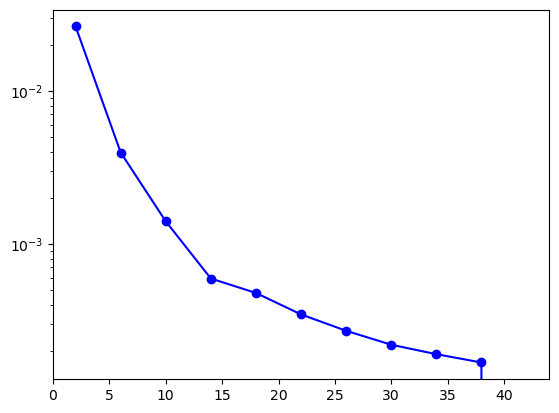

In [36]:
reftod = alltod[-1,:,:]
var = np.zeros(len(N_nsub))
for i in range(len(N_nsub)):
    var[i] = np.var(alltod[i,:,:] - reftod) / np.var(reftod)
    
plot(N_nsub, var,'bo-')
yscale('log')

In [37]:
kvalues = arange(1,11,1)
kvalues

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [57]:
alltod_recon = np.zeros((len(kvalues), 992, d_TOD['npointings']))
for j,k in enumerate(kvalues):
    print(k)
    d_recon = copy.deepcopy(d_TOD)
    d_recon['nf_recon'] = 2
    d_recon['nf_sub'] = 2
    
    Nbfreq, nus_edge, nus, deltas, Delta, Nbbands = qubic.compute_freq(d_recon['filter_nu']/1e9, Nfreq=d_recon['nf_recon'])

    Qubic_sky = qss.Qubic_sky({'cmb':seed, 'Dust':'d0'}, d_recon)
    mapin_recon_noconv = Qubic_sky.get_simple_sky_map()
    
    d_recon['nf_recon'] = 2
    d_recon['nf_sub'] = 2 * k

    # Pointing
    p = qubic.get_pointing(d_recon)
    # Scene
    s = qubic.QubicScene(d_recon)
    # Instrument
    q = qubic.QubicMultibandInstrument(d_recon)
    # QUBIC Acquisition
    qubic_acquisition = Acq.QubicIntegrated(q, p, s, d_recon, nus_edge)

    mapin_recon_conv = mapin_recon_noconv.copy()

    for i in range(d_recon['nf_recon']):
        print(qubic_acquisition.final_fwhm[i])
        C = HealpixConvolutionGaussianOperator(fwhm=qubic_acquisition.final_fwhm[i])
        mapin_recon_conv[i] = C(mapin_recon_noconv[i])

    H_recon = qubic_acquisition.get_operator(convolution=False)
    alltod_recon[j,:,:] = H_recon(mapin_recon_conv)

    ### Free Memory
    del H_recon, s, q, qubic_acquisition
    gc.collect()
    

1


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0.005005366622402476
0.004414318434526763
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Making sum from 192.50 to 218.27
Making sum from 218.27 to 247.50
2


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 1
2 3
0.005015249049472696
0.0044230339159859414
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Making sum from 192.50 to 218.27
Making sum from 218.27 to 247.50
3


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 2
3 5
0.005017082125339713
0.0044246505369454235
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Making sum from 192.50 to 218.27
Making sum from 218.27 to 247.50
4


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 3
4 7
0.005017723923485131
0.0044252165497069805
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 4
5 9
0.005018021023253498
0.004425478567074206
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 5
6 11
0.005018182421104542
0.004425620906599543
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 6
7 13
0.005018279742430453
0.004425706735941416
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 7
8 15
0.00501834290912816
0.004425762443732509
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 8
9 17
0.0050183862166513415
0.004425800637377916
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotatio

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


You asked 1200 pointings with repeat strategy so I will provide 400 pointings repeated 3 times.
0 9
10 19
0.005018417194588913
0.0044258279573509045
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotation3dMatrix.__init__.
Info apcdhcp125.in2p3.fr: Allocating (1190400,9) elements = 163.4765625 MiB in FSRRotati

0.02627993467442897
0.006965013555700609
0.003965260213076156
0.002278465580418657
0.001418528575697718
0.0010195690502131653
0.0006111549141530726
0.0006138494240463306
0.0004943475750843594
0.0004293151649310913


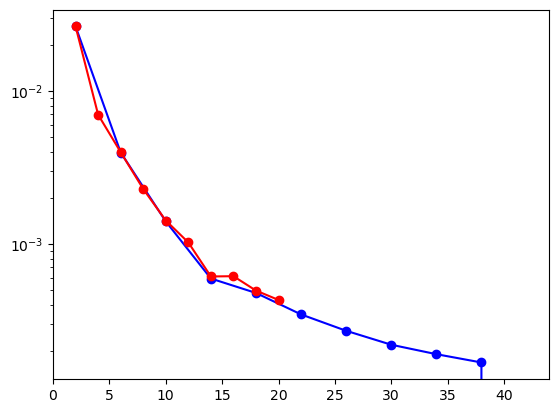

In [59]:
reftod = alltod[-1,:,:]
var_recon = np.zeros(len(kvalues))
for i in range(len(kvalues)):
    var_recon[i] = np.var(alltod_recon[i,:,:] - reftod) / np.var(reftod)
    print(var_recon[i])
    
plot(N_nsub, var,'bo-')
plot(2*kvalues, var_recon,'ro-')
yscale('log')